<a href="https://colab.research.google.com/github/nandini-n07/Customer_Segmentation_Using_Clustering-EnsembleLearning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation using Clustering + Ensemble Learning**


#  1. Define the Problem Statement.
  
  **Problem:**
Retail and e-commerce businesses need to understand their customer base to drive sales and improve user experience. This project aims to segment customers into distinct groups based on their behavior and demographics, using clustering and then apply ensemble classification for better analysis.  

**Type of Problem:**

*   Clustering (Unsupervised) to identify natural customer segments

*   Classification (Supervised) to classify new customers into those segments

**Business Value:**

*   Enables personalized marketing strategies
*   Improves customer retention and acquisition

*   Helps in resource allocation for customer service and campaigns


# 2. Import Libraries.  
Start with importing the basics:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# 3. Identify and Preprocess the Dataset.   
***Load the dataset:***

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


***Handling the Missing Values:***

In [ ]:
df.isnull().sum()
df = df.drop_duplicates()


***Encode categorical features:***

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])  # Male:1, Female:0


***Scaling/Standardization:***

In [ ]:
from sklearn.preprocessing import StandardScaler
features = df.drop(['CustomerID'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


# 4. Choose Suitable Algorithms and Frameworks.
**Frameworks:**   
Pandas/NumPy for data handling.  
Scikit-learn for preprocessing, clustering, and classification.   
XGBoost for gradient boosting.  
Matplotlib/Seaborn for visualization

**Algorithms:**  
Clustering: K-Means and DBSCAN.  
Classification: Random Forest and XGBoost.

# 5. Train, Validate, and Test the Model

**1. Unsupervised Clustering**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


**2. Convert Clusters into Target Labels**

In [ ]:
X = scaled_data
y = df['Cluster']  # This becomes your classification target


**3. Train/Validation/Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**4. Train Ensemble Models**.  
Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

XGBoost:

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

**5. Evaluate the Models**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Random Forest Accuracy: 0.9
XGBoost Accuracy: 0.9


# 6. Optimize and Fine-Tune the Model

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_rf.fit(X_train, y_train)
print("Best params:", grid_rf.best_params_)



Best params: {'max_depth': 4, 'n_estimators': 200}


**Feature Importance**

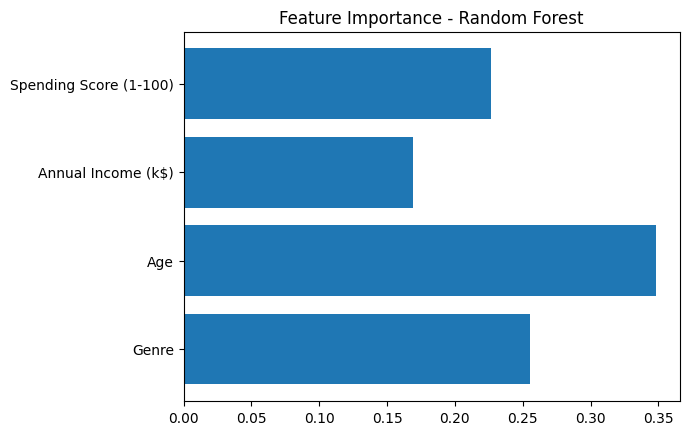

In [ ]:
importances = rf.feature_importances_
feature_names = features.columns

plt.barh(feature_names, importances)
plt.title("Feature Importance - Random Forest")
plt.show()
